--- Starting Task 1: Data Analysis and Preprocessing (eda.ipynb) ---
Datasets loaded successfully from '../data/'!

--- Fraud_Data Overview (Initial Load) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

--- IpAddress_to_Country Overview (Initial Load) ---
<class 'pa

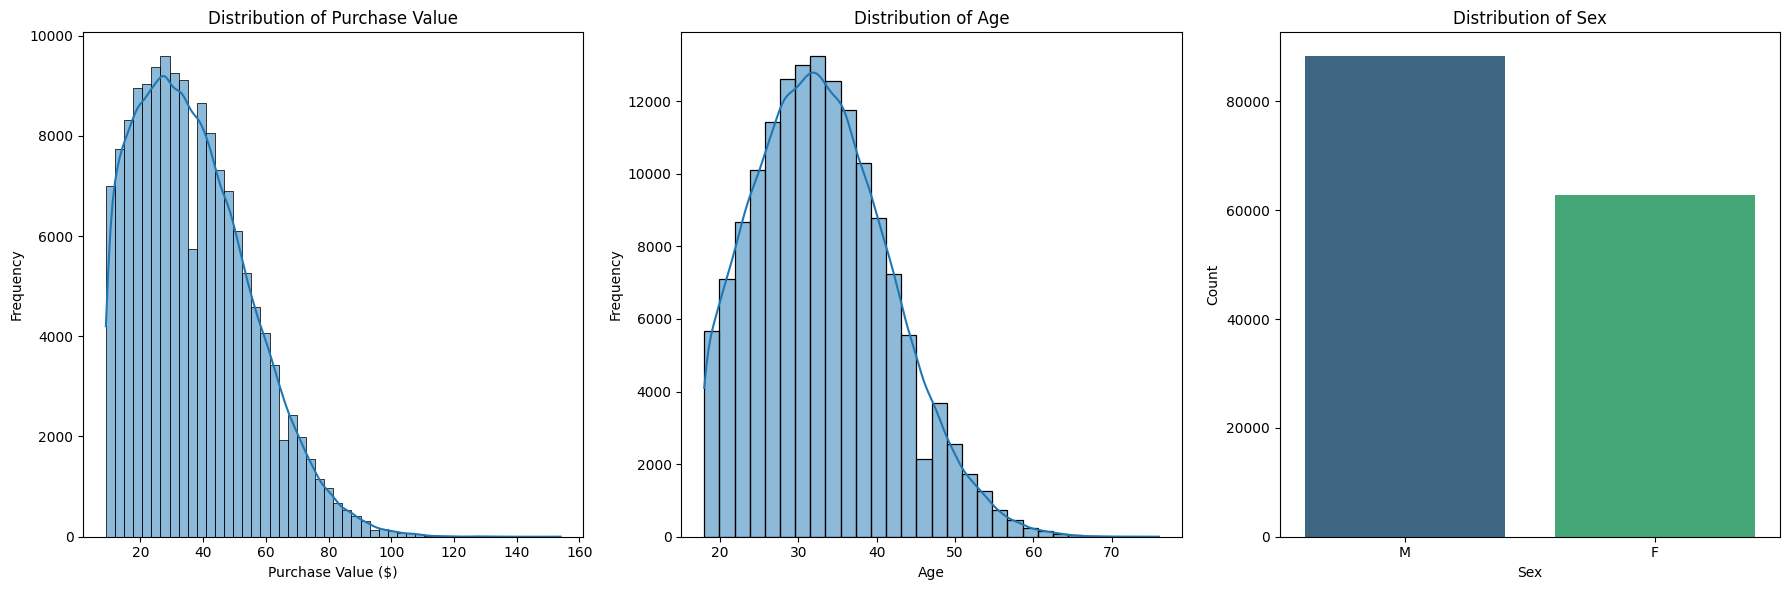

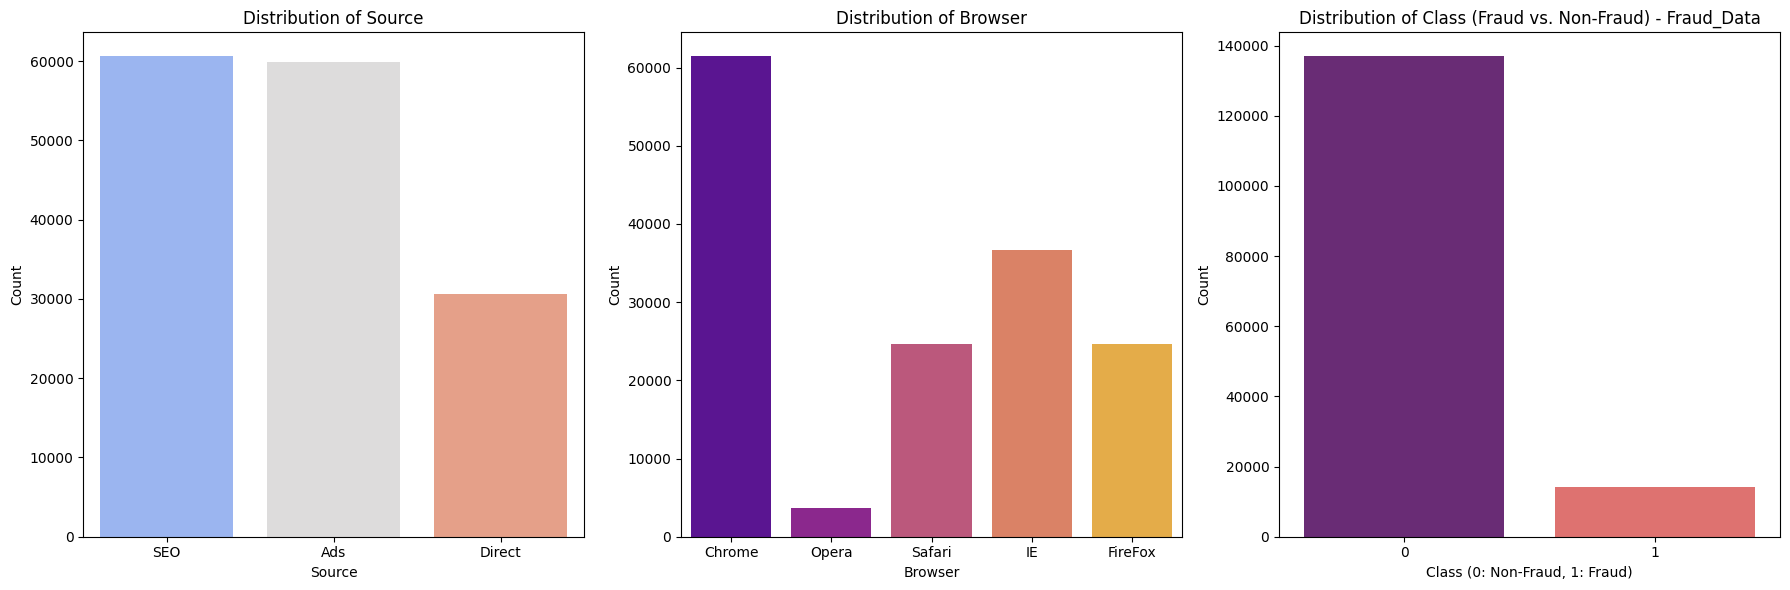


--- Univariate Analysis: CreditCard_Data (Descriptive Statistics) ---
                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.74

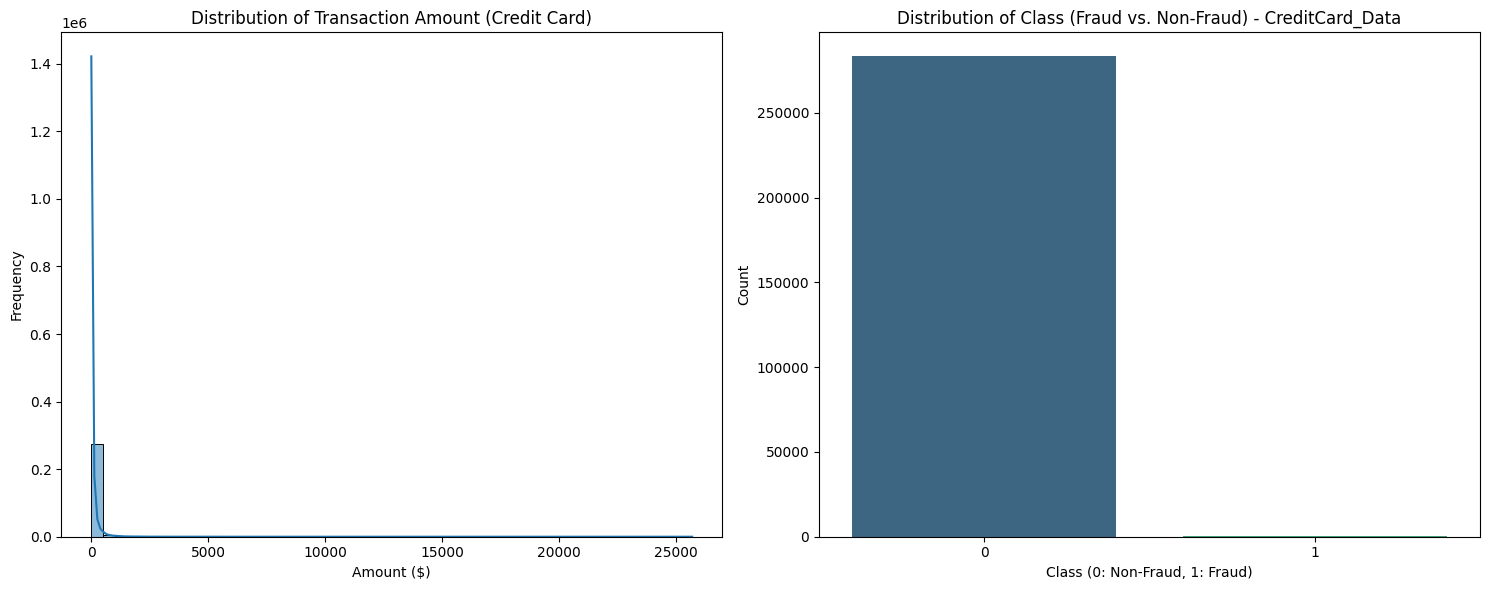


--- Bivariate Analysis: Fraud_Data (Class vs. Features) ---


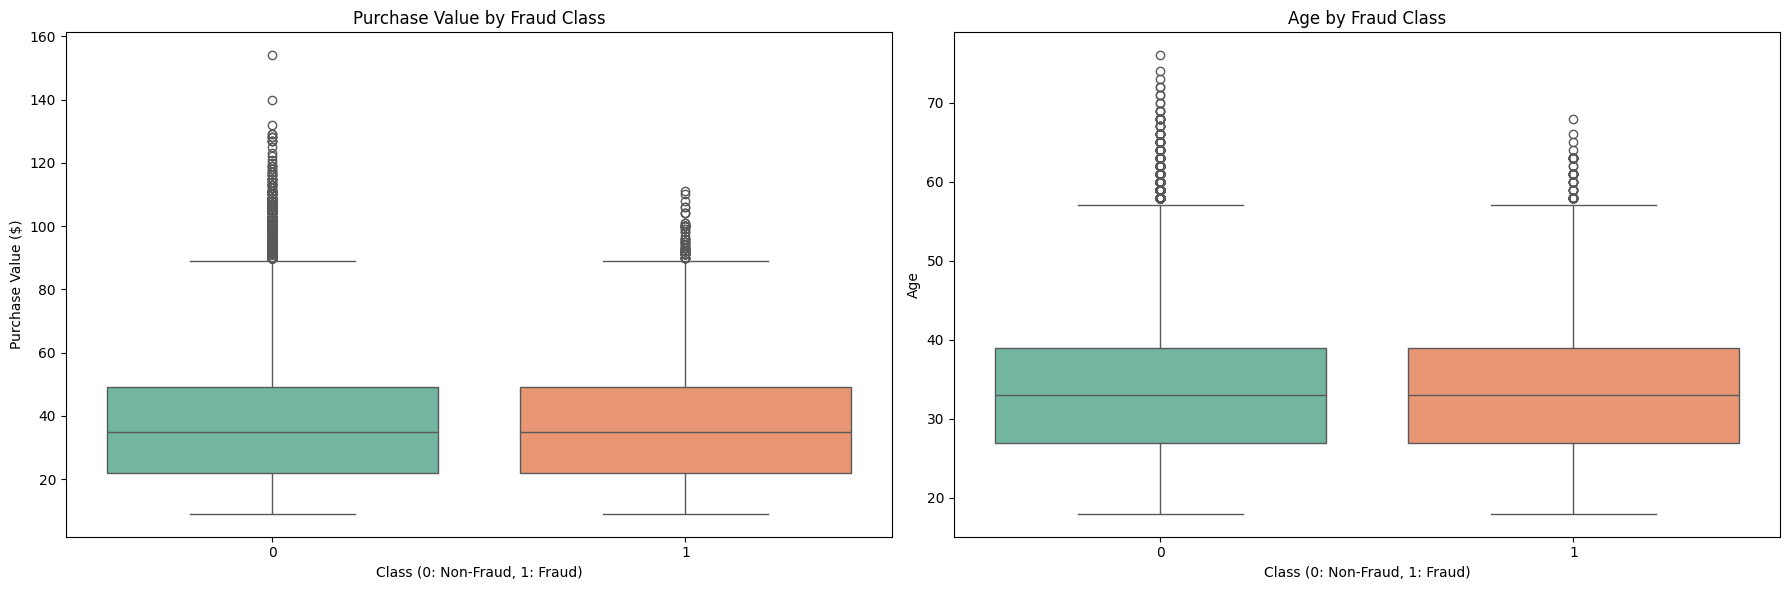

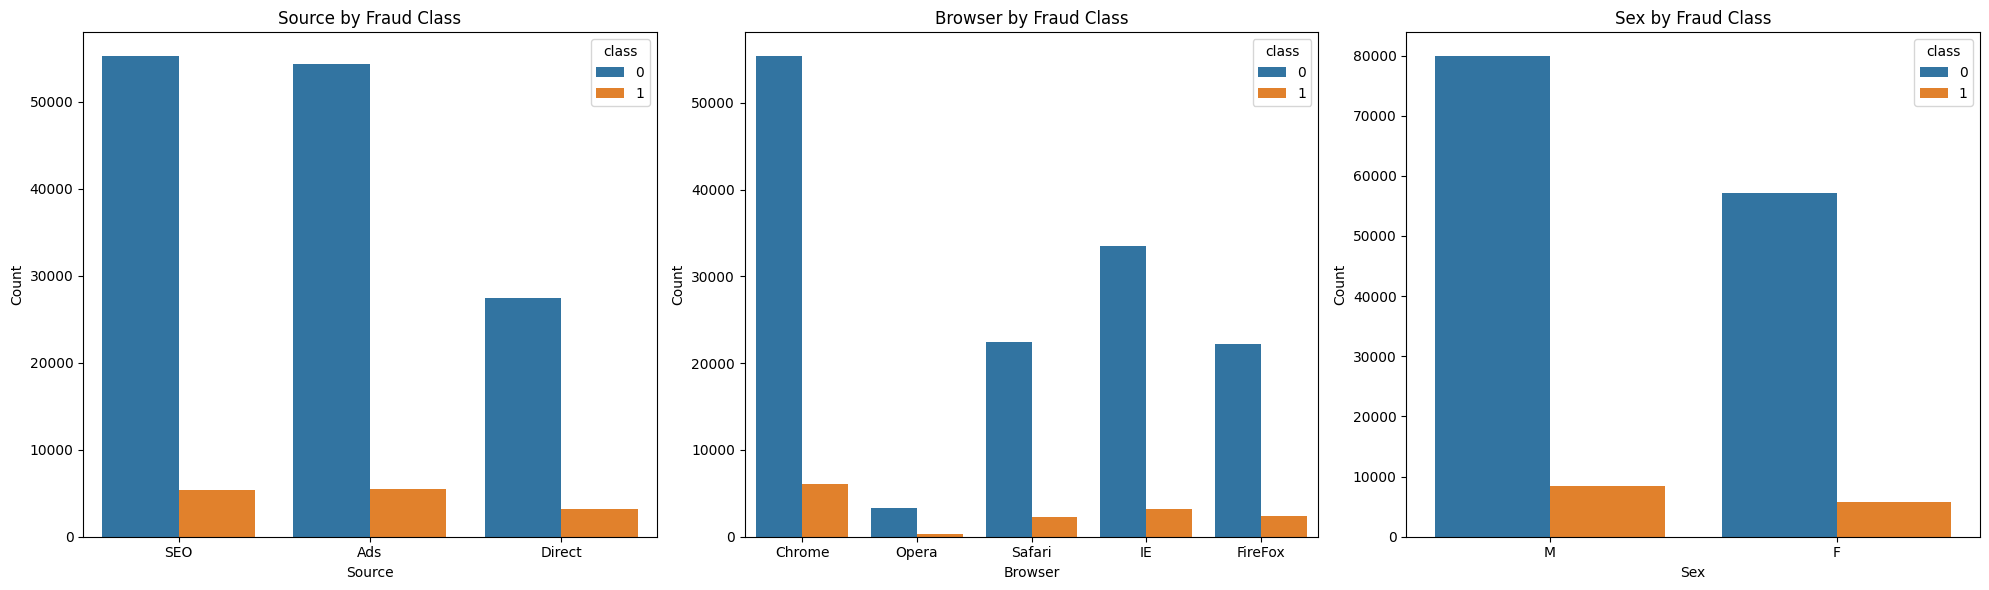


--- Bivariate Analysis: CreditCard_Data (Class vs. Amount) ---


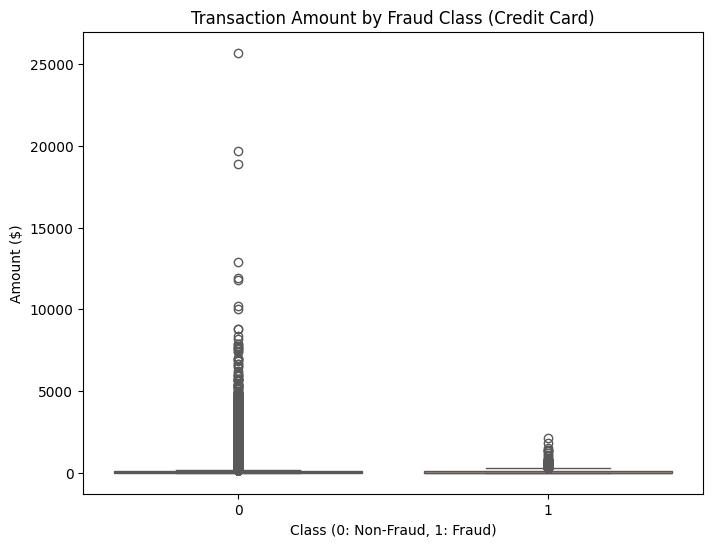


--- Correlation Matrix for CreditCard_Data Features ---


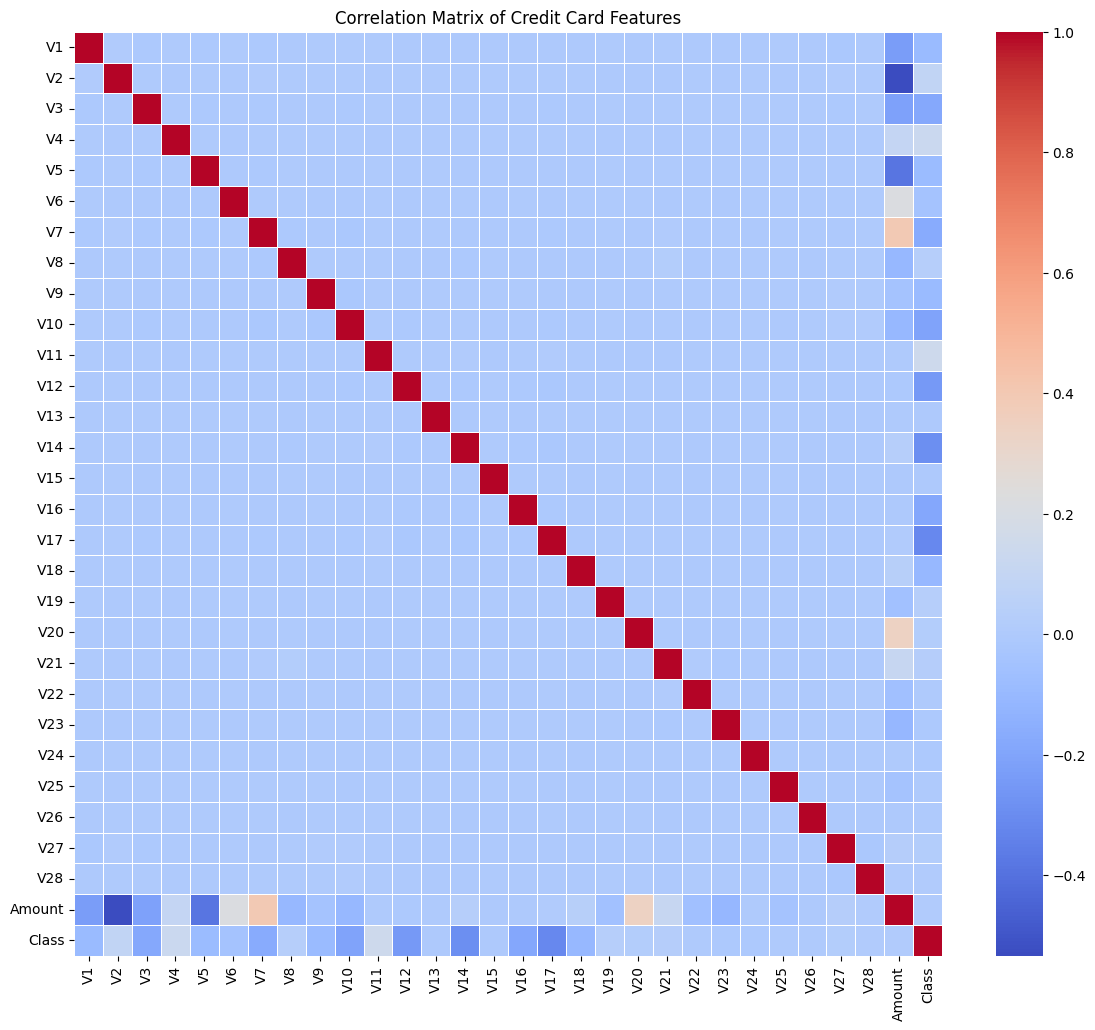


--- Merging Fraud_Data with IpAddress_to_Country for Geolocation Analysis ---
Applying IP to Country mapping (this may take a moment for large datasets)...
IP to Country mapping complete!

--- Distribution of Countries in Fraud_Data ---
country
United States         58049
Unknown               21966
China                 12038
Japan                  7306
United Kingdom         4490
Korea Republic of      4162
Germany                3646
France                 3161
Canada                 2975
Brazil                 2961
Italy                  1944
Australia              1844
Netherlands            1680
Russian Federation     1616
India                  1310
Name: count, dtype: int64


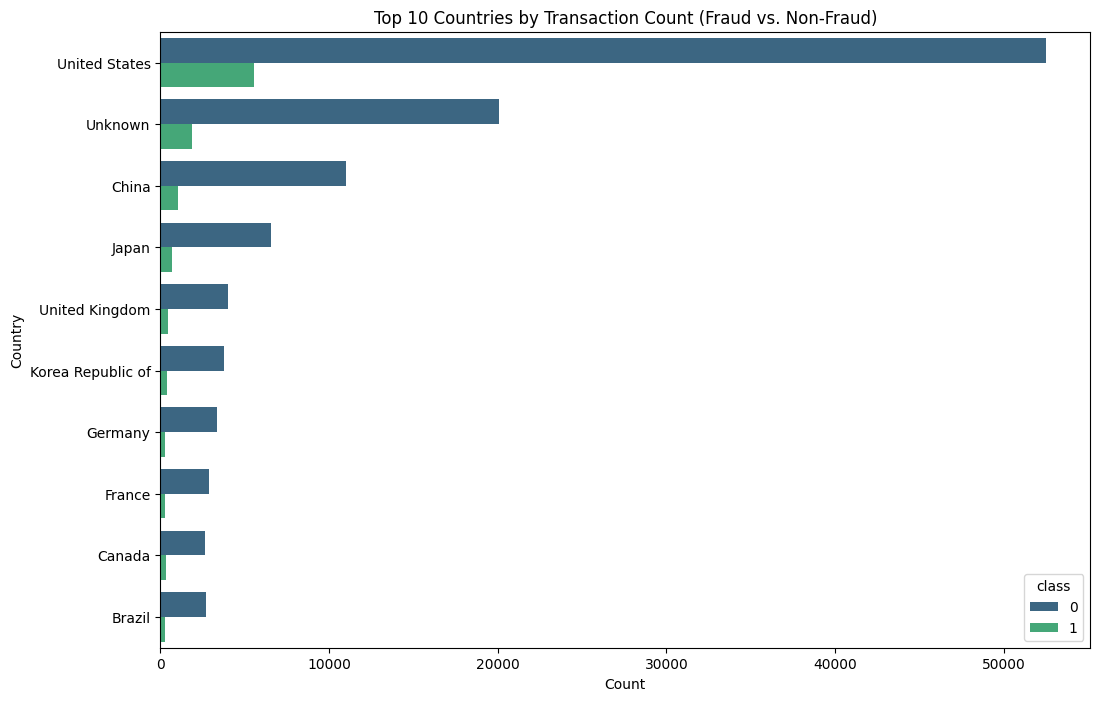


--- Starting Feature Engineering for Fraud_Data ---
Extracting time-based features...
Calculating transaction frequency and velocity features...
Feature Engineering complete for Fraud_Data.

Fraud_Data after Feature Engineering (first 5 rows):
   user_id         signup_time       purchase_time  purchase_value  \
0   226648 2015-05-12 16:00:31 2015-06-13 23:42:18              45   
1   103319 2015-02-05 22:20:04 2015-03-29 00:39:07              94   
2    36633 2015-05-10 00:49:53 2015-07-22 03:18:01              46   
3   325729 2015-01-01 04:25:22 2015-01-01 04:25:23              57   
4    64674 2015-01-01 04:25:23 2015-01-01 04:25:24              57   

       device_id  source  browser sex  age  ip_address  ...  hour_of_day  \
0  AAALBGNHHVMKG  Direct   Chrome   M   34  2494581089  ...           23   
1  AAAWIHVCQELTP     Ads   Chrome   M   29   809263681  ...            0   
2  AAAXJHWCLISKY     Ads       IE   M   40     2891496  ...            3   
3  AAAXXOZJRZRAO     Ads  Fire

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings

# Suppress warnings for cleaner output in the notebook
warnings.filterwarnings('ignore')

print("--- Starting Task 1: Data Analysis and Preprocessing (eda.ipynb) ---")

# --- 1. Load Datasets ---
# IMPORTANT: Assuming this notebook is in the 'notebooks/' directory,
# and data files are in the 'data/' directory (one level up).
try:
    fraud_data = pd.read_csv('../data/Fraud_Data.csv')
    ip_to_country = pd.read_csv('../data/IpAddress_to_Country.csv')
    credit_card_data = pd.read_csv('../data/creditcard.csv')
    print("Datasets loaded successfully from '../data/'!")
except FileNotFoundError as e:
    print(f"Error loading files. Ensure your data files are in the 'data/' directory relative to this notebook: {e}")
    # It's crucial to have the data to proceed, so we'll exit if not found.
    raise SystemExit("Data files not found. Please check paths and directory structure.")

# Display initial overview of each dataset
print("\n--- Fraud_Data Overview (Initial Load) ---")
print(fraud_data.info())
print("\n--- IpAddress_to_Country Overview (Initial Load) ---")
print(ip_to_country.info())
print("\n--- CreditCard_Data Overview (Initial Load) ---")
print(credit_card_data.info())

# --- 2. Handle Missing Values ---
# Check for missing values across all datasets
print("\n--- Missing Values in Fraud_Data (Before Processing) ---")
print(fraud_data.isnull().sum())

print("\n--- Missing Values in IpAddress_to_Country (Before Processing) ---")
print(ip_to_country.isnull().sum())

print("\n--- Missing Values in CreditCard_Data (Before Processing) ---")
print(credit_card_data.isnull().sum())

# Observation: No explicit NaNs found in raw data at this stage.
# NaN values will be introduced later during feature engineering (e.g., time_diff for first entries).
# These will be handled by SimpleImputer within the preprocessing pipelines defined later.

# --- 3. Data Cleaning ---

# Remove duplicates
print(f"\nFraud_Data - Original rows: {len(fraud_data)}")
fraud_data.drop_duplicates(inplace=True)
print(f"Fraud_Data - Rows after dropping duplicates: {len(fraud_data)}")

print(f"\nIpAddress_to_Country - Original rows: {len(ip_to_country)}")
ip_to_country.drop_duplicates(inplace=True)
print(f"IpAddress_to_Country - Rows after dropping duplicates: {len(ip_to_country)}")

print(f"\nCreditCard_Data - Original rows: {len(credit_card_data)}")
credit_card_data.drop_duplicates(inplace=True)
print(f"CreditCard_Data - Rows after dropping duplicates: {len(credit_card_data)}")

# Correct data types
# Convert timestamp columns to datetime objects in Fraud_Data
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Convert IP addresses to integer for merging later.
# Handle potential non-numeric values by coercing errors and dropping rows if necessary.
# This ensures a clean integer conversion for IP lookup.
fraud_data['ip_address'] = pd.to_numeric(fraud_data['ip_address'], errors='coerce')
initial_fraud_rows = len(fraud_data)
# Drop rows where ip_address could not be converted (e.g., was a string like 'N/A' or NaN after coerce)
fraud_data.dropna(subset=['ip_address'], inplace=True)
if len(fraud_data) < initial_fraud_rows:
    print(f"Dropped {initial_fraud_rows - len(fraud_data)} rows from Fraud_Data due to invalid IP addresses.")
fraud_data['ip_address'] = fraud_data['ip_address'].astype(np.int64) # Use np.int64 for large IP numbers

# Ensure IP ranges in IpAddress_to_Country are also int64 for consistent comparison
ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].astype(np.int64)
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].astype(np.int64)

print("\n--- Data Types after Correction in Fraud_Data ---")
print(fraud_data.info())
print("\n--- Data Types after Correction in IpAddress_to_Country ---")
print(ip_to_country.info())

# --- 4. Exploratory Data Analysis (EDA) ---

print("\n--- Starting Exploratory Data Analysis (EDA) ---")

# Univariate Analysis - Fraud_Data
print("\n--- Univariate Analysis: Fraud_Data (Descriptive Statistics) ---")
# Removed 'datetime_is_numeric=True' for broader Pandas version compatibility
print(fraud_data.describe(include='all'))

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(fraud_data['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Value')
plt.xlabel('Purchase Value ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(fraud_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.countplot(x='sex', data=fraud_data, palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='source', data=fraud_data, palette='coolwarm')
plt.title('Distribution of Source')
plt.xlabel('Source')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(x='browser', data=fraud_data, palette='plasma')
plt.title('Distribution of Browser')
plt.xlabel('Browser')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(x='class', data=fraud_data, palette='magma')
plt.title('Distribution of Class (Fraud vs. Non-Fraud) - Fraud_Data')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Univariate Analysis - CreditCard_Data
print("\n--- Univariate Analysis: CreditCard_Data (Descriptive Statistics) ---")
print(credit_card_data.describe())

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(credit_card_data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount (Credit Card)')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(x='Class', data=credit_card_data, palette='viridis')
plt.title('Distribution of Class (Fraud vs. Non-Fraud) - CreditCard_Data')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bivariate Analysis - Fraud_Data (with 'class' target)
print("\n--- Bivariate Analysis: Fraud_Data (Class vs. Features) ---")

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='purchase_value', data=fraud_data, palette='Set2')
plt.title('Purchase Value by Fraud Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Purchase Value ($)')

plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='age', data=fraud_data, palette='Set2')
plt.title('Age by Fraud Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='source', hue='class', data=fraud_data, palette='tab10')
plt.title('Source by Fraud Class')
plt.xlabel('Source')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(x='browser', hue='class', data=fraud_data, palette='tab10')
plt.title('Browser by Fraud Class')
plt.xlabel('Browser')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(x='sex', hue='class', data=fraud_data, palette='tab10')
plt.title('Sex by Fraud Class')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bivariate Analysis - CreditCard_Data (with 'Class' target)
print("\n--- Bivariate Analysis: CreditCard_Data (Class vs. Amount) ---")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_data, palette='Set2')
plt.title('Transaction Amount by Fraud Class (Credit Card)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount ($)')
plt.show()

# Correlation matrix for CreditCard_Data (V features and Amount)
print("\n--- Correlation Matrix for CreditCard_Data Features ---")
plt.figure(figsize=(14, 12))
# Exclude 'Time' for correlation as it's sequential, not necessarily linearly correlated in a meaningful way
corr_matrix_credit = credit_card_data.drop('Time', axis=1).corr()
sns.heatmap(corr_matrix_credit, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Credit Card Features')
plt.show()


# --- 5. Merge Datasets for Geolocation Analysis ---
print("\n--- Merging Fraud_Data with IpAddress_to_Country for Geolocation Analysis ---")

# Sort ip_to_country by lower_bound_ip_address for efficient searching
ip_to_country_sorted = ip_to_country.sort_values(by='lower_bound_ip_address').reset_index(drop=True)

def get_country(ip_address, ip_ranges_df):
    """
    Finds the country for a given IP address by searching through IP ranges.
    Uses binary search (searchsorted) for efficiency.
    """
    # Find the index where ip_address would be inserted to maintain sorted order
    # 'right' side means it finds the first element *greater* than ip_address
    idx = ip_ranges_df['lower_bound_ip_address'].searchsorted(ip_address, side='right') - 1

    # Check if the found index is valid and if the IP falls within the range
    if idx >= 0 and ip_address <= ip_ranges_df.loc[idx, 'upper_bound_ip_address']:
        return ip_ranges_df.loc[idx, 'country']
    return 'Unknown' # Assign 'Unknown' if IP doesn't match any range

# Apply the function to each IP address in fraud_data
print("Applying IP to Country mapping (this may take a moment for large datasets)...")
fraud_data['country'] = fraud_data['ip_address'].apply(lambda x: get_country(x, ip_to_country_sorted))
print("IP to Country mapping complete!")

# Display value counts for the new 'country' column
print("\n--- Distribution of Countries in Fraud_Data ---")
print(fraud_data['country'].value_counts().head(15)) # Show top 15 countries

# Visualize top countries by fraud class
plt.figure(figsize=(12, 8))
sns.countplot(y='country', hue='class', data=fraud_data,
              order=fraud_data['country'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Countries by Transaction Count (Fraud vs. Non-Fraud)')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


# --- 6. Feature Engineering ---
print("\n--- Starting Feature Engineering for Fraud_Data ---")

# Time-Based features for Fraud_Data.csv
print("Extracting time-based features...")
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek # Monday=0, Sunday=6
fraud_data['day_of_year'] = fraud_data['purchase_time'].dt.dayofyear
fraud_data['month_of_year'] = fraud_data['purchase_time'].dt.month
fraud_data['week_of_year'] = fraud_data['purchase_time'].dt.isocalendar().week.astype(int) # Week of year

# time_since_signup: Calculate the duration between signup_time and purchase_time.
fraud_data['time_since_signup_seconds'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()
# Handle cases where purchase_time might be before signup_time (unlikely but good practice)
fraud_data['time_since_signup_seconds'] = fraud_data['time_since_signup_seconds'].apply(lambda x: max(0, x))

# Transaction frequency and velocity for Fraud_Data.csv
print("Calculating transaction frequency and velocity features...")
# Sort data for accurate `diff()` calculations within groups
fraud_data = fraud_data.sort_values(by=['user_id', 'purchase_time']).reset_index(drop=True)
fraud_data['time_diff_user'] = fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds()

fraud_data = fraud_data.sort_values(by=['device_id', 'purchase_time']).reset_index(drop=True)
fraud_data['time_diff_device'] = fraud_data.groupby('device_id')['purchase_time'].diff().dt.total_seconds()

# Fill NaNs created by .diff() (first transaction for a user/device)
# A common strategy is to fill with 0, implying no prior transaction within the group.
fraud_data['time_diff_user'].fillna(0, inplace=True)
fraud_data['time_diff_device'].fillna(0, inplace=True)

# Count of transactions per device_id and user_id
# Using transform('count') ensures the result is broadcast back to the original DataFrame's shape
fraud_data['device_transaction_count'] = fraud_data.groupby('device_id')['purchase_time'].transform('count')
fraud_data['user_transaction_count'] = fraud_data.groupby('user_id')['purchase_time'].transform('count')

print("Feature Engineering complete for Fraud_Data.")
print("\nFraud_Data after Feature Engineering (first 5 rows):")
print(fraud_data.head())
print("\nFraud_Data Info after Feature Engineering:")
print(fraud_data.info())


# --- 7. Data Transformation (Setup for Pipelines) ---
print("\n--- Data Transformation: Analyzing Class Imbalance and Setting up Preprocessing Pipelines ---")

# Handle Class Imbalance: Analyze the class distribution.
print("\n--- Class Imbalance in Fraud_Data ---")
print(fraud_data['class'].value_counts(normalize=True))
print(f"Fraudulent transactions in Fraud_Data: {fraud_data['class'].sum()} ({fraud_data['class'].value_counts(normalize=True)[1]:.2%})")

print("\n--- Class Imbalance in CreditCard_Data ---")
print(credit_card_data['Class'].value_counts(normalize=True))
print(f"Fraudulent transactions in CreditCard_Data: {credit_card_data['Class'].sum()} ({credit_card_data['Class'].value_counts(normalize=True)[1]:.2%})")

# Justification for SMOTE (as discussed in the report):
# SMOTE will be applied to the training data only after the train-test split in Task 2.
# It generates synthetic samples for the minority class to balance the dataset,
# helping the model learn fraud patterns more effectively without simple duplication.

# Define features for transformation pipelines for Fraud_Data
# Exclude 'user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address' as they are either IDs or converted to new features
X_fraud_pre_split = fraud_data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'class'], axis=1)
y_fraud_pre_split = fraud_data['class']

numerical_features_fraud = X_fraud_pre_split.select_dtypes(include=np.number).columns.tolist()
categorical_features_fraud = X_fraud_pre_split.select_dtypes(include='object').columns.tolist()

print(f"\nFraud_Data - Numerical features identified for scaling: {numerical_features_fraud}")
print(f"Fraud_Data - Categorical features identified for encoding: {categorical_features_fraud}")

# Define features for transformation pipelines for CreditCard_Data
X_credit_pre_split = credit_card_data.drop(['Class'], axis=1)
y_credit_pre_split = credit_card_data['Class']

numerical_features_credit = X_credit_pre_split.columns.tolist() # All features are numerical for credit card data

print(f"\nCreditCard_Data - Numerical features identified for scaling: {numerical_features_credit}")


# Normalization and Scaling (StandardScaler) & Encode Categorical Features (One-Hot Encoding)
# These transformers are defined here as part of Task 1's "Data Transformation" setup.
# Their application (fit_transform) will occur within the modeling pipelines in Task 2.

# --- Preprocessing Pipeline Setup for Fraud_Data ---
# Numerical transformer: Impute NaNs (for time_diff features) then Scale
numerical_transformer_fraud = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Handles NaNs from time_diff_user/device
    ('scaler', StandardScaler())
])

# Categorical transformer: One-Hot Encode
categorical_transformer_fraud = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' for new categories in test set
])

# Create a preprocessor using ColumnTransformer for Fraud_Data
preprocessor_fraud = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_fraud, numerical_features_fraud),
        ('cat', categorical_transformer_fraud, categorical_features_fraud)
    ],
    remainder='passthrough' # Keep other columns (if any) as they are, though none expected here
)
print("\nPreprocessing pipeline for Fraud_Data defined.")

# --- Preprocessing Pipeline Setup for CreditCard_Data ---
# Numerical transformer: Scale (no specific NaNs expected for these features)
numerical_transformer_credit = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a preprocessor using ColumnTransformer for CreditCard_Data
preprocessor_credit = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_credit, numerical_features_credit)
    ],
    remainder='passthrough'
) # This was missing the closing parenthesis
print("Preprocessing pipeline for CreditCard_Data defined.")

print("\n--- Task 1: Data Analysis and Preprocessing (eda.ipynb) complete. ---")
